##                   Sentiment Analysis of Real-time Flipkart Product Reviews


###  Objective
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


### Modeling Approach
1. Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
2. Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.



 ### 1.Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv("data.csv")

In [91]:
df.head(3)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [93]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [94]:
df[['Review text']].tail(3)

,Review text
8515,GoodREAD MORE
8516,GoodREAD MORE
8517,GoodREAD MORE


In [95]:
df['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [96]:
df.duplicated().sum()

4

In [97]:
df = df.drop_duplicates()

In [98]:
# Define the classify_review function
def classify_review(rating):
    if rating >= 3:
        return 'Positive'
    else:
        return 'Negative'



In [99]:
df['Ratings'] = df['Ratings'].apply(classify_review)

### Input variable & Output variable

In [100]:
#Independent variable
x=df[["Review text"]]

In [101]:
x

,Review text
0,"Nice product, good quality, but price is now r..."
1,They didn't supplied Yonex Mavis 350. Outside ...
2,Worst product. Damaged shuttlecocks packed in ...
3,"Quite O. K. , but nowadays the quality of the..."
4,Over pricedJust â?¹620 ..from retailer.I didn'...
...,...
8509,Not sure why we have charged for this product ...
8510,GoodREAD MORE
8512,GoodREAD MORE
8513,GoodREAD MORE


In [102]:
#Dependent variable
y=df[["Ratings"]]

In [103]:
y

,Ratings
0,Positive
1,Negative
2,Negative
3,Positive
4,Negative
...,...
8509,Negative
8510,Negative
8512,Negative
8513,Positive


###  Splitting the data into training and testing data

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=35)

###  2. Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.

In [106]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [107]:
stem = PorterStemmer()

In [108]:
lemma = WordNetLemmatizer()

In [109]:
import re
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

In [110]:
#applying preprocessing on test_data
x_train= x_train['Review text'].apply(preprocess)

In [111]:
x_train

337                                     good shutles read
3460                                               okread
4793                                              badread
7747    good quality delivered earlier expected date read
5333                               okay okay shuttlesread
                              ...                        
3321                             great perfect defectread
3007                                     quality goodread
7148    shuttle good feather shuttle flight life good ...
1295                                 good shuttlecockread
5833                                     nice productread
Name: Review text, Length: 6811, dtype: object

In [112]:
#applying preprocessing on test_data
x_test = x_test['Review text'].apply(preprocess)

In [113]:
import pandas as pd

# Sample DataFrame
data = {'Ratings': ['1', '2', '3', '4', '5']}
df = pd.DataFrame(data)

# Convert the 'Ratings' column to numeric type
df['Ratings'] = pd.to_numeric(df['Ratings'])

# Define the classify_review function
def classify_review(rating):
    if rating >= 3.0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the classify_review function to the 'Ratings' column
df['Ratings'] = df['Ratings'].apply(classify_review)

# Display the DataFrame with the added 'Sentiment' column
print(df)


    Ratings
0  Negative
1  Negative
2  Positive
3  Positive
4  Positive


###  3. Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse    Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.


In [114]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
%time x_train_num = cv.fit_transform(x_train)

Wall time: 31.9 ms


In [115]:
%time x_test_num = cv.transform(x_test)

Wall time: 6.71 ms


### Building a model

In [116]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()


In [117]:
nb_model.fit(x_train_num,y_train)

MultinomialNB()

In [118]:
x_train_num.shape

(6811, 2667)

In [119]:
y_train.shape

(6811, 1)

### Evaluation

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [121]:
y_train_pred = nb_model.predict(x_train_num)

In [122]:
y_train_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [123]:
train_score=accuracy_score(y_train,y_train_pred)

In [124]:
train_score

0.931874908236676

In [125]:
y_pred=nb_model.predict(x_test_num)

In [126]:
y_pred

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [127]:
test_score=accuracy_score(y_pred,y_test)

In [128]:
test_score

0.9242513211978861

In [129]:
confusion_matrix(y_train, y_train_pred)

array([[ 509,  357],
       [ 107, 5838]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

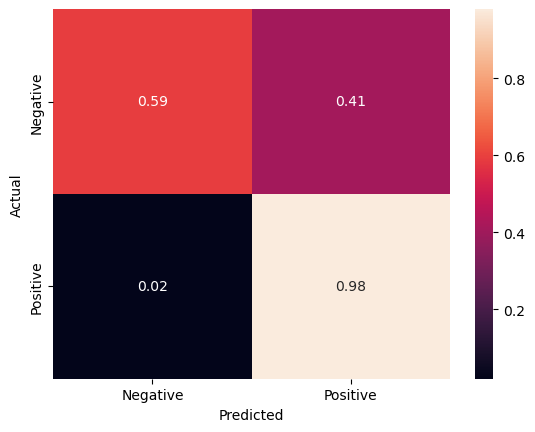

In [130]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

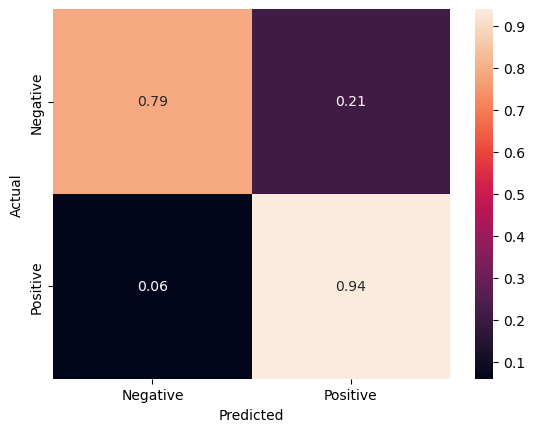

In [131]:
cm = confusion_matrix(y_pred,y_test)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [142]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec

In [143]:
import warnings

warnings.filterwarnings('ignore')

In [144]:
from sklearn.metrics import f1_score
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    grid_search.fit(x_train, y_train)
    best_models[algo] = grid_search.best_estimator_
#     print('Score on Test Data:', grid_search.score(x_test, y_test, pos_label='Positive'))
    y_pred = grid_search.best_estimator_.predict(x_test)
    f1 = f1_score(y_test, y_pred, pos_label='Positive')  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
F1 Score on Test Data: 0.9548302011210024
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
F1 Score on Test Data: 0.9403884795713329
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
F1 Score on Test Data: 0.9360525406152783


In [145]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [146]:
import joblib
import os


In [148]:
save_dir = r"C:\Users\HP\Downloads\sentimental_analysis_internship\models"

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(x_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='Positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")


********** naive_bayes **********
Wall time: 7.51 ms
F1 Score (Positive Class): 0.9548302011210024
Model Size: 82196 Bytes
********** decision_tree **********
Wall time: 8.53 ms
F1 Score (Positive Class): 0.9403884795713329
Model Size: 223866 Bytes
********** logistic_regression **********
Wall time: 11.1 ms
F1 Score (Positive Class): 0.9360525406152783
Model Size: 58454 Bytes


In [149]:
import joblib

filepath = r'D:\flip_gan\best models'

try:
    model = joblib.load(filepath)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Error loading the model: [Errno 2] No such file or directory: 'D:\\flip_gan\\best models'
